In [1]:
%load_ext autoreload
%autoreload 2
import os
opj = os.path.join
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from prfpy_csenf.model import CSenFModel
from prfpy_csenf.stimulus import CSenFStimulus
from prfpy_csenf.fit import CSenFFitter
from prfpy_csenf.rf import csenf_exponential



'''
LOOK HERE 
/data1/projects/dumoulinlab/Lab_members/Carlien/VisualAcuitySimulation/nCSF/CSF_control_s1_simulation/Simulation
'''

do_all = False # Do all the simulations, or just the first one (for testing)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/daghlian/.conda/envs/dag_mcmc/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


### Load stimulus settings 

In [2]:
# COPIED AND PASTED FROM EXPERIMENT PARAMETERS...
# Load stimulus parameters. 
# 6 SF levels (sfs_level)
# 14 contrast levels (con_level)
sfs_level = np.array([ 0.5,  1.,   3.,   6.,  12.,  18. ] )
con_level = np.array([ 0.25,     0.38962,  0.60722,  0.94635,  1.4749,   2.2986,   3.5823,   5.583, 8.701,   13.56,    21.134,   32.937,   51.332,   80.     ])
# Sequence of SFs and contrast levels (214 steps)
sfs_seq = np.array([
    0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,3.0  ,
    3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,
    18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,
    18.0 ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,
    1.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,
    6.0  ,6.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,
    0.5  ,0.5  ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,
    12.0 ,12.0 ,12.0 ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,6.0  ,
    6.0  ,6.0  ,6.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,1.0  ,
    1.0  ,1.0  ,1.0  ,1.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,12.0 ,
    12.0 ,12.0 ,12.0 ,12.0 ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,
    3.0  ,3.0  ,3.0  ,3.0  ,3.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,0.0  ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,
    18.0 ,18.0 ,18.0 ,18.0 ,18.0 ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,
    0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.5  ,0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,
    0.0  ,0.0  ,0.0  ,0.0  ,0.0  ,])

con_seq = np.array([
    0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,80.0      ,
    32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,0.38962   ,0.25      ,
    0.25      ,0.60722   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,32.937    ,51.332    ,
    80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    80.0      ,32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,0.38962   ,
    0.25      ,0.25      ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,
    32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,80.0      ,32.937    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,0.94635   ,0.60722   ,
    0.38962   ,0.25      ,0.25      ,0.60722   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,8.701     ,13.56     ,21.134    ,
    32.937    ,51.332    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,80.0      ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,3.5823    ,2.2986    ,1.4749    ,
    0.94635   ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,5.583     ,
    8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,80.0      ,51.332    ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,3.5823    ,
    2.2986    ,1.4749    ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,3.5823    ,
    5.583     ,8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,0.0       ,80.0      ,51.332    ,32.937    ,21.134    ,13.56     ,8.701     ,5.583     ,
    3.5823    ,2.2986    ,1.4749    ,0.60722   ,0.25      ,0.25      ,0.38962   ,0.60722   ,0.94635   ,1.4749    ,2.2986    ,
    3.5823    ,5.583     ,8.701     ,13.56     ,32.937    ,80.0      ,0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,
    0.0       ,0.0       ,0.0       ,0.0       ,0.0       ,])

# Store the indices of the parameters in the parameter vector
csf_param_idx = {
    'width_r'   : 0,
    'sf0'       : 1,
    'maxC'      : 2,
    'width_l'   : 3,
    'crf_exp'   : 4,
    'beta'      : 5,
    'baseline'  : 6,
    'hrf_1'     : 7,
    'hrf_2'     : 8,
    'rsq'       : 9,
    }

# PRFPY stimulus
csenf_stim = CSenFStimulus(
    SFs     = sfs_level,
    CONs    = con_level,
    SF_seq  = sfs_seq,
    CON_seq = con_seq,
    TR      = 1.5,
    )

csenf_model = CSenFModel(stimulus = csenf_stim)

/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/stimulus.py:252: RuntimeWarning: divide by zero encountered in log10
  self.log_SF_seq = np.log10(SF_seq)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/stimulus.py:254: RuntimeWarning: divide by zero encountered in true_divide
  self.CON_S_seq = 100/CON_seq


# Set the ground truth parameters

In [3]:
# Use same ground truth (GT) parameters as defined by carlien
GT_width_r  = np.array([1, 1.3])
GT_sf0      = np.array([1, 2])
GT_maxC     = np.array([100,150])
GT_width_l  = np.array([0.448])
GT_crf_exp  = np.array([3,1.5])
# Other parameters
GT_beta     = np.array([1.0])
GT_baseline = np.array([0.0])
GT_hrf_1    = np.array([1.0])
GT_hrf_2    = np.array([0.0])

# For parameters with more than 1 value, make a grid of possible values
GT_width_r, GT_sf0, GT_maxC, GT_crf_exp = np.meshgrid(GT_width_r, GT_sf0, GT_maxC, GT_crf_exp)
GT_width_r  = GT_width_r.ravel()
GT_sf0      = GT_sf0.ravel()
GT_maxC     = GT_maxC.ravel()
GT_crf_exp  = GT_crf_exp.ravel()
# For the other parameters, just repeat the value for each grid point
GT_width_l  = np.repeat(GT_width_l, GT_width_r.size)
GT_beta     = np.repeat(GT_beta, GT_width_r.size)
GT_baseline = np.repeat(GT_baseline, GT_width_r.size)
GT_hrf_1    = np.repeat(GT_hrf_1, GT_width_r.size)
GT_hrf_2    = np.repeat(GT_hrf_2, GT_width_r.size)

# Put all GT parameters in a single dictionary
GT_params = {
    'width_r'   : GT_width_r,
    'sf0'       : GT_sf0,
    'maxC'      : GT_maxC,
    'width_l'   : GT_width_l,
    'crf_exp'   : GT_crf_exp,
    'beta'      : GT_beta,
    'baseline'  : GT_baseline,
    'hrf_1'     : GT_hrf_1,
    'hrf_2'     : GT_hrf_2,
    }



### Make the simulated time series (with different levels of noise)

/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/model.py:991: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':


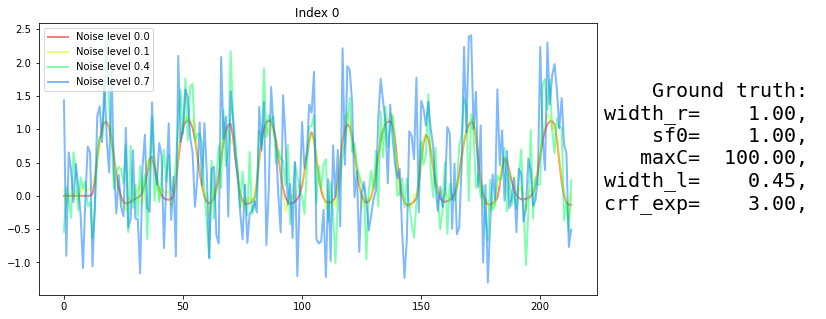

In [6]:
# Clean version
sim_tc_clean = csenf_model.return_prediction(**GT_params)

# Add noise to create simulated timecourses
g_noise_reps = 10 # number of repetitions for each noise level per parameter set
total_reps = g_noise_reps * GT_params['width_r'].size
g_noise_levels = [0.0, 0.1, 0.4, 0.7] # std of gaussian noise
# Get different levels of cool colormap, for each level of noise
cmap = mpl.cm.get_cmap('hsv')
g_noise_cols = [cmap(i/(len(g_noise_levels)+1)) for i in range(len(g_noise_levels))]

# Note - we do not split the simulations by noise level.
# -> here the split is done afterwards, based on the rsq
n_timepoints = sim_tc_clean.shape[-1]   # number of timepoints in simulated timecourse

noisy_sim_tc = []
csf_model_index = []                    # list to store index of parameter set for each timecourse
csf_noise_index = []                    # list to store index of noise level for each timecourse
for i_model in range(GT_params['width_r'].size):
    for g_noise_level in g_noise_levels:
        g_noise = np.random.normal(0, g_noise_level, (g_noise_reps, n_timepoints))    
        noisy_sim_tc.append(sim_tc_clean[i_model,:] + g_noise)
        csf_model_index.append([i_model]*g_noise_reps)
        csf_noise_index.append([g_noise_level]*g_noise_reps)

    if not do_all:
        break

noisy_sim_tc = np.vstack(noisy_sim_tc)
csf_model_index = np.hstack(csf_model_index)
csf_noise_index = np.hstack(csf_noise_index)

# Plot example of timecourse at different noise levels
for i_gt in range(0, GT_params['width_r'].size):  
    plt.figure(figsize=(10,5))
    # Title is index of parameter set
    plt.title(f'Index {i_gt}')
    
    for i_line,i_noise in enumerate(g_noise_levels):
        # Get the first idx with this noise level & parameter set
        idx_list = (csf_model_index == i_gt) & (csf_noise_index == i_noise)
        idx = np.where(idx_list)[0][0]
        plt.plot(
            noisy_sim_tc[idx,:], color=g_noise_cols[i_line], 
            label=f'Noise level {g_noise_levels[i_line]}',
            lw=2,
            alpha=0.5)
            
    plt.legend()
    # Add text with ground truth parameters
    gt_txt = 'Ground truth: \n' + \
        f'width_r={GT_params["width_r"][i_gt]:>8.2f}, \n' + \
        f'sf0={GT_params["sf0"][i_gt]:>8.2f}, \n' + \
        f'maxC={GT_params["maxC"][i_gt]:>8.2f}, \n' + \
        f'width_l={GT_params["width_l"][i_gt]:>8.2f}, \n' + \
        f'crf_exp={GT_params["crf_exp"][i_gt]:>8.2f}, \n'

    # Add text to outside right of plot
    # Use monospaced font
    plt.text(
        1.4, 0.5, gt_txt, transform=plt.gca().transAxes, 
        fontsize=20, va='center', ha='right',
        family='monospace',)

    if not do_all:
        break       


### Fit the noisy simulated data

In [7]:

# [1] Setup bounds:
bounds = {
    'width_r'   : [0,5],
    'sf0'       : [0, 18],
    'maxC'      : [0, 200], 
    'width_l'   : [0.448, 0.448],
    'crf_exp'   : [0, 10], 
    'beta'      : [0, 1000],
    'baseline'  : [-5,5], 
    'hrf_1'     : [1, 1],
    'hrf_2'     : [0,0],
}

# [2] Setup grids:
grid_nr = 25 # number of steps in grid
width_r_grid    = np.linspace(bounds['width_r'][0], bounds['width_r'][1], grid_nr)     
sf0_grid        = np.linspace(bounds['sf0'][0], bounds['sf0'][1], grid_nr)     
maxC_grid       = np.linspace(bounds['maxC'][0], bounds['maxC'][1], grid_nr)
width_l_grid    = np.array(bounds['width_l'][0])
crf_exp_grid    = np.linspace(bounds['crf_exp'][0], bounds['crf_exp'][1], grid_nr)
hrf_1_grid = None
hrf_2_grid = None
# -> & grid bounds
csf_grid_bounds = [bounds['beta']]

# [3] Setup iterative bounds
bounds_list = [
    (bounds['width_r']),     # width_r
    (bounds['sf0']),     # sf0
    (bounds['maxC']),    # maxC
    (bounds['width_l']),     # width_l
    (bounds['crf_exp']),     # width_l
    (bounds['beta']),   # beta
    (bounds['baseline']),      # baseline
    (bounds['hrf_1']),      # baseline
    (bounds['hrf_2']),      # baseline
]
# -> Constraints determines which scipy fitter is used
csf_constraints = None   # None -> bgfs, [] -> TC



In [9]:
# [4] Loop through noise levels and fit simulated data

# Make fitter object
csenf_fitter = CSenFFitter(
    data    = noisy_sim_tc,
    model   = csenf_model,
    fit_hrf = True,
    n_jobs=10,
)
# Start grid fit
csenf_fitter.grid_fit(
    width_r_grid    = width_r_grid,
    sf0_grid        = sf0_grid,
    maxC_grid       = maxC_grid,
    width_l_grid    = width_l_grid,
    crf_exp_grid    = crf_exp_grid,
    hrf_1_grid      = hrf_1_grid,
    hrf_2_grid      = hrf_2_grid,
    verbose         = True,
    fixed_grid_baseline=True,
    grid_bounds=csf_grid_bounds, 
    n_batches=10,
)

# Start iterative fit
csenf_fitter.iterative_fit(
    rsq_threshold = 0.1,            
    verbose = False,
    bounds = bounds_list,
    constraints = csf_constraints,
    xtol=0.001,   
    ftol=0.001,           
    )

# # Store recovered parameters in dict
recovered_params = csenf_fitter.iterative_search_params


/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/model.py:926: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  prediction_params = np.array([width_r,
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:230: RuntimeWarning: divide by zero encountered in log10
  log_sf0 = np.log10(sf0)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:231: RuntimeWarning: divide by zero encountered in log10
  log_maxC = np.log10(maxC)
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/rf.py:248: RuntimeWarning: invalid value encountered in multiply
  R_curve = 10**(log_maxC - ((log_sfs_gr-log_sf0)**2) * (width_r**2))
/data1/projects/dumoulinlab/Lab_members/Marc

Each batch contains approx. 4 voxels.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/programs/prfpy_csenf/prfpy_csenf/fit.py:1993: RuntimeWarning: invalid value encountered in true_divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/dumoulinlab/Lab_members/Marcus/pr

In [10]:
# Calculate derived parameters for GT csf models

# Calculate log10 versions of parameters
log10_sf0   = np.log10(GT_params['sf0'])
log10_maxC  = np.log10(GT_params['maxC'])

# Calculate CSF curves + matrix 
csf_mat, csf_curve = csenf_exponential(
    log_SF_grid = csenf_stim.log_SF_grid, 
    CON_S_grid  = csenf_stim.CON_S_grid,
    width_r     = GT_params['width_r'], 
    sf0         = GT_params['sf0'], 
    maxC        = GT_params['maxC'], 
    width_l     = GT_params['width_l'], 
    crf_exp     = GT_params['crf_exp'],
    return_curve=True,
    )    

# Log CSF curve
logcsf_curve = np.log10(csf_curve)    
logcsf_curve[logcsf_curve<0 ] = 0

# Calculate AULCSF (area under log CSF)
aulcsf = np.trapz(logcsf_curve, x=np.log10(sfs_level), axis=0) # NOTE -> TO TAKE INTO ACCOUNT THE CRF? NEEDS SOME KIND OF WEIGHTING...

# Calculate sfmax
sfmax = 10**((np.sqrt(log10_maxC/(GT_params['width_r']**2)) + log10_sf0))

# Put it all together in a dict
GT_dict = {
    **GT_params,
    'log10_sf0'     : log10_sf0,
    'log10_maxC'    : log10_maxC,
    'csf_mat'       : csf_mat,
    'csf_curve'     : csf_curve,
    'logcsf_curve'  : logcsf_curve,
    'aulcsf'        : aulcsf,
    'sfmax'         : sfmax,
}


In [11]:
# Put recovered params in a convenient dictionary format

reco_dict = {}


width_r     = recovered_params[:, csf_param_idx['width_r']]
sf0         = recovered_params[:, csf_param_idx['sf0']]
maxC        = recovered_params[:, csf_param_idx['maxC']]
width_l     = recovered_params[:, csf_param_idx['width_l']]
crf_exp     = recovered_params[:, csf_param_idx['crf_exp']]
beta        = recovered_params[:, csf_param_idx['beta']]
baseline    = recovered_params[:, csf_param_idx['baseline']]
hrf_1       = recovered_params[:, csf_param_idx['hrf_1']]
hrf_2       = recovered_params[:, csf_param_idx['hrf_2']]
rsq         = recovered_params[:, csf_param_idx['rsq']]

# Calculate log10 versions of parameters
log10_sf0   = np.log10(sf0)
log10_maxC  = np.log10(maxC)

# Calculate CSF curves + matrix 
csf_mat, csf_curve = csenf_exponential(
    log_SF_grid = csenf_stim.log_SF_grid, 
    CON_S_grid  = csenf_stim.CON_S_grid,
    width_r     = width_r, 
    sf0         = sf0, 
    maxC        = maxC, 
    width_l     = width_l, 
    crf_exp     = crf_exp,
    return_curve=True,
    )    

# Log CSF curve
logcsf_curve = np.log10(csf_curve)    
logcsf_curve[logcsf_curve<0 ] = 0

# Calculate AULCSF (area under log CSF)
aulcsf = np.trapz(logcsf_curve, x=np.log10(sfs_level), axis=0)

# Calculate sfmax
sfmax = 10**((np.sqrt(log10_maxC/(width_r**2)) + log10_sf0))
sfmax = np.nan_to_num(sfmax)

reco_dict['width_r'] = width_r.copy()    
reco_dict['sf0'] = sf0.copy()
reco_dict['log10_sf0'] = log10_sf0.copy()
reco_dict['maxC'] = maxC.copy()
reco_dict['log10_maxC'] = log10_maxC.copy()
reco_dict['width_l'] = width_l.copy()
reco_dict['crf_exp'] = crf_exp.copy()
reco_dict['beta'] = beta.copy()
reco_dict['baseline'] = baseline.copy()
reco_dict['hrf_1'] = hrf_1.copy()
reco_dict['hrf_2'] = hrf_2.copy()
reco_dict['rsq'] = rsq.copy()
reco_dict['aulcsf'] = aulcsf.copy()
reco_dict['sfmax'] = sfmax.copy()
reco_dict['csf_curve'] = csf_curve.copy()
reco_dict['logcsf_curve'] = logcsf_curve.copy()
reco_dict['csf_mat'] = csf_mat.copy()
# 




# Plotting of recovered parameters

### Recovered parameters vs GROUND TRUTH -> swarm plots

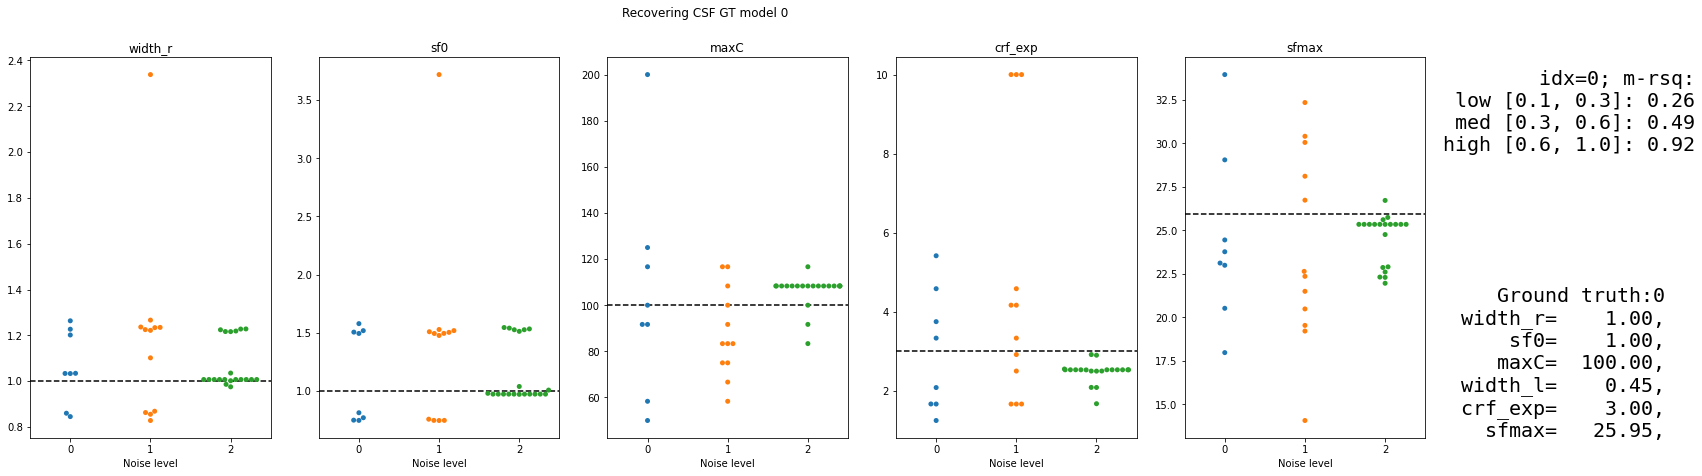

In [41]:
rsq_noise_levels = {
    'low' : [0.1, 0.3],
    'med' : [0.3, 0.6],
    'high': [0.6, 1.0],
}
# Get different levels of cool colormap, for each level of noise
cmap = mpl.cm.get_cmap('hsv')
rsq_l_cols = [cmap(i/(len(rsq_noise_levels))) for i in range(len(rsq_noise_levels))]
# Plot recovered parameters
params_to_plot = ['width_r', 'sf0', 'maxC', 'crf_exp', 'sfmax']     # Which parameters to plot 
# Split data into different rsq levels
rsq_idx = {}
for rsq_level in rsq_noise_levels.keys():
    rsq_idx[rsq_level] = (reco_dict['rsq'] > rsq_noise_levels[rsq_level][0]) & \
        (reco_dict['rsq'] < rsq_noise_levels[rsq_level][1])

# Loop through GT models
for i_gt in range(0, GT_params['width_r'].size):
    i_noise = csf_model_index==i_gt # index of fits with this model
    fig, ax = plt.subplots(1, len(params_to_plot), figsize=(25,7))
    sup_title = fig.suptitle(f'Recovering CSF GT model {i_gt}')
    
    # Add text box with mrsq for each noise level
    rsq_txt = f'idx={i_gt}; m-rsq:\n'
    for rsq_level in rsq_noise_levels.keys():
        rsq_txt += f'{rsq_level:>10} {rsq_noise_levels[rsq_level]}: {np.mean(reco_dict["rsq"][rsq_idx[rsq_level] & i_noise]):1.2f}\n'

    fig.text(1.05, 0.75, rsq_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)

    # Add the text for the GT parameters:
    gt_txt = f'Ground truth:{i_gt} \n' + \
        f'width_r={GT_dict["width_r"][i_gt]:>8.2f}, \n' + \
        f'sf0={GT_dict["sf0"][i_gt]:>8.2f}, \n' + \
        f'maxC={GT_dict["maxC"][i_gt]:>8.2f}, \n' + \
        f'width_l={GT_dict["width_l"][i_gt]:>8.2f}, \n' + \
        f'crf_exp={GT_dict["crf_exp"][i_gt]:>8.2f}, \n' + \
        f'sfmax={GT_dict["sfmax"][i_gt]:>8.2f}, \n'
    fig.text(1.04, 0.25, gt_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)    

    for iP,param in enumerate(params_to_plot):    
        # sns.swarm plot of {param}, split by noise level. Colors of each level determined by g_noise_cols
        # -> with labels on x-axis
        # -> make data frame for data
        # data = {}
        data = []
        for rsq_level in rsq_noise_levels.keys():
            # data[rsq_level] = reco_dict[param][rsq_idx[rsq_level] & i_noise]
            data.append(reco_dict[param][rsq_idx[rsq_level] & i_noise])
        # Swarm plot, of data. Labels with rsq level
        sns.swarmplot(
            data = data,
            ax = ax[iP],
            # palette = rsq_l_cols,
            )        
        # sns.swarmplot(
        #     data = data,
        #     ax = ax[iP],
        #     # palette = g_noise_cols,
        #     )
        # break
        # # Also sns boxplot, displaying same data as in the swarmplot
        # # -> but a little bit transparent
        # sns.boxplot(
        #     data = data,
        #     ax = ax[iP],
        #     palette = g_noise_cols,
        #     boxprops=dict(alpha=.3),
        #     )

        ax[iP].set_title(param)
        ax[iP].set_xlabel(f'Noise level')        
        ax[iP].axhline(GT_dict[param][i_gt], color='k', linestyle='--')

    if not do_all:
        break


In [34]:
data

{'low': array([1.03316033, 0.85996263, 1.03421654, 1.26340198, 1.0335855 ,
        1.2266802 , 0.84528863, 1.20148227]),
 'med': array([1.26646803, 1.22169602, 1.23356197, 1.22495481, 1.10169106,
        0.85554936, 0.8630185 , 1.23462695, 0.82821654, 1.2362276 ,
        0.86868919, 2.3381208 ]),
 'high': array([1.00713323, 1.00713323, 1.00713323, 1.00713323, 1.00713323,
        1.00713323, 1.00713323, 1.00713323, 1.00713323, 1.00713323,
        0.98601684, 1.00179332, 1.22740719, 1.22793104, 1.21652946,
        0.97527826, 1.21615461, 1.21875569, 1.03529822, 1.22420872])}

### Recovered parameters vs GROUND TRUTH -> CSF PLOTS

In [ ]:

i_gt_list = [0,1,2,3,4]#1,2,3,4,5] # indices of GT models to plot

for i_gt in i_gt_list:
    i_noise = csf_model_index==i_gt # index of noisy fits with this model

    # Plot recovered CSF curves
    fig, axs = plt.subplots(1, len(g_noise_levels.keys()), figsize=(25,7))
    sup_title = fig.suptitle(f'Recovering CSF GT model {i_gt}')
    # Add text box with mrsq for each noise level
    rsq_txt = f'idx={i_gt}; m-rsq:\n'
    for g_noise_label in g_noise_levels.keys():
        rsq_txt += f'{g_noise_label:>10}: {np.mean(reco_dict[g_noise_label]["rsq"]):1.2f}\n'
    fig.text(1.02, 0.75, rsq_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)
    # Add the text for the GT parameters:
    gt_txt = f'Ground truth:{i_gt} \n' + \
        f'width_r={GT_dict["width_r"][i_gt]:>8.2f}, \n' + \
        f'sf0={GT_dict["sf0"][i_gt]:>8.2f}, \n' + \
        f'maxC={GT_dict["maxC"][i_gt]:>8.2f}, \n' + \
        f'width_l={GT_dict["width_l"][i_gt]:>8.2f}, \n' + \
        f'crf_exp={GT_dict["crf_exp"][i_gt]:>8.2f}, \n' + \
        f'sfmax={GT_dict["sfmax"][i_gt]:>8.2f}, \n'
    fig.text(1.02, 0.25, gt_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)

    for i_ax,g_noise_label in enumerate(g_noise_levels.keys()):
        # Add title with mean rsq
        this_rsq = reco_dict[g_noise_label]['rsq'][i_noise].copy()
        mrsq = np.mean(this_rsq)
        print(f'Number of fits with rsq < 0.1: {np.sum(this_rsq<0.1)}')
        # - make sure it doesn't overlap with the plots
        # fig.subplots_adjust(top=0.85)
        
        # Setup the axis
        ax = axs[i_ax]
        ax.set_title(f'{g_noise_label} noise: m-rsq = {mrsq:.2f}')    
        ax.set_xlabel('Spatial frequency (c/deg)')
        ax.set_ylabel('Contrast sensitivity')
        ax.set_xscale('log')
        ax.set_yscale('log')

        # Scatter the points sampled
        ax.scatter(
            sfs_seq, 100/con_seq, color='k', alpha=0.5
        )

        # Plot ground truth -> thick black line
        ax.plot(
            sfs_level, 
            GT_dict['csf_curve'][:,i_gt], 
            color='k', linewidth=5, label='Ground truth')

        # Plot the mean curve
        this_csf_curve = reco_dict[g_noise_label]['csf_curve'][:,i_noise]
        ax.plot(
            sfs_level,
            np.mean(this_csf_curve, axis=1),
            color=g_noise_cols[g_noise_label],
            label=f'{g_noise_label} noise',
            linestyle='--', alpha=1, lw=5
            )
        
        # Plot a patch between the lowest and highest values of the curve
        ax.fill_between(
            sfs_level,
            np.min(this_csf_curve, axis=1),
            np.max(this_csf_curve, axis=1),
            alpha=0.5,
            color=g_noise_cols[g_noise_label],        
            )


        # Put a grid on the axis (only the major ones)
        ax.grid(which='both', axis='both', linestyle='--', alpha=0.5)
        # Make the axis square
        ax.set_aspect('equal', 'box') 
        ax.set_xticks([.1, 1,10,100])
        ax.set_yticks([.1, 1,10,100, 1000])
        ax.set_xlim([0.1, 100])
        ax.set_ylim([0.1, 1000])
        ax.legend()


### RECOVERED PARAMS -> CRF curves

In [ ]:

i_gt_list = [0,1,2,3,4]#1,2,3,4,5] # indices of GT models to plot
def get_crf_resp(crf_exp, Q=20, C=np.linspace(0,100,100)):
    '''
    # a = 1;
    # C = 0.25:1:100;   % RMS contrast
    # Q = 20;
    # q_true = true_vals(4);
    # resp_true = a.*((C.^q_true)./((C.^q_true)+(Q.^q_true)));    
    '''
    return (C**crf_exp[...,np.newaxis])/((C**crf_exp[...,np.newaxis])+(Q**crf_exp[...,np.newaxis]))
for i_gt in i_gt_list:
    i_noise = csf_model_index==i_gt # index of noisy fits with this model

    # Plot recovered CSF curves
    fig, axs = plt.subplots(1, len(g_noise_levels.keys()), figsize=(25,7))
    sup_title = fig.suptitle(f'Recovering CRF GT model {i_gt}')
    # Add text box with mrsq for each noise level
    rsq_txt = f'idx={i_gt}; m-rsq:\n'
    for g_noise_label in g_noise_levels.keys():
        rsq_txt += f'{g_noise_label:>10}: {np.mean(reco_dict[g_noise_label]["rsq"]):1.2f}\n'
    fig.text(1.02, 0.75, rsq_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)
    # Add the text for the GT parameters:
    gt_txt = f'Ground truth:{i_gt} \ncrf_exp={GT_dict["crf_exp"][i_gt]:>8.2f}, \n'
    fig.text(1.02, 0.25, gt_txt, transform=fig.transFigure, fontsize=20, va='center', ha='right', family='monospace',)

    contrast_pc = np.linspace(0, 100, 100)
    for i_ax,g_noise_label in enumerate(g_noise_levels.keys()):
        # Add title with mean rsq
        this_rsq = reco_dict[g_noise_label]['rsq'][i_noise].copy()
        mrsq = np.mean(this_rsq)
        print(f'Number of fits with rsq < 0.1: {np.sum(this_rsq<0.1)}')
        # - make sure it doesn't overlap with the plots
        # fig.subplots_adjust(top=0.85)
        
        # Setup the axis
        ax = axs[i_ax]
        ax.set_title(f'{g_noise_label} noise: m-rsq = {mrsq:.2f}')    
        ax.set_xlabel('contrast (%)')
        ax.set_ylabel('fMRI Response')

        # Plot ground truth -> thick black line
        crf_resp = get_crf_resp(crf_exp=GT_dict['crf_exp'][i_gt], C=contrast_pc)
        ax.plot(
            contrast_pc, 
            crf_resp, 
            color='k', linewidth=5, label='Ground truth')

        # # Plot the mean curve
        crf_resp = get_crf_resp(
            crf_exp=reco_dict[g_noise_label]['crf_exp'][i_noise],
            C=contrast_pc)

        ax.plot(
            contrast_pc,
            np.mean(crf_resp, axis=0),
            color=g_noise_cols[g_noise_label],
            label=f'{g_noise_label} noise',
            linestyle='--', alpha=1, lw=5
            )
        
        # Plot a patch between the lowest and highest values of the curve
        ax.fill_between(
            contrast_pc,
            np.min(crf_resp, axis=0),
            np.max(crf_resp, axis=0),
            alpha=0.5,
            color=g_noise_cols[g_noise_label],        
            )


        # Put a grid on the axis (only the major ones)
        ax.grid(which='both', axis='both', linestyle='--', alpha=0.5)
        # Make the axis square
        # ax.set_aspect('equal', 'box') 
        ax.set_xticks([0, 50,100])
        ax.set_yticks([0, 0.5, 1.0])
        ax.set_xlim([0, 100])
        ax.set_ylim([0, 1])
        ax.legend()
